switchSort()

In [1]:
import random

def generate(N): #create arrays of varying sizes and random int values
  L_arr = random.sample(range(1,10**10), N)
  return L_arr

def merge(n, m):
  key_comparison = 0
  if m-n <= 0: return 0
  mid = n + (m-n)//2
  a, b = n, mid+1
  while a <= mid and b <= m:
    key_comparison += 1
    if L[a] < L[b]:
      a += 1
    elif L[a] > L[b]: # TO DO: write one-liner code
      temp = L[b]
      for i in range(b, a, -1):
        L[i] = L[i-1]
      L[a] = temp
      a += 1
      b += 1
      mid += 1
    else: # L[a] == L[b]
      if a == mid and b == m: break
      a += 1
      temp = L[b]
      for i in range(b, a, -1): 
        L[i] = L[i-1]
      L[a] = temp
      a += 1
      b += 1
      mid += 1
  return key_comparison

def mergeSort(n, m, S):
  key_comparison_l=key_comparison_r=key_comparison_merge=0
  mid = n + (m-n)//2
  if m-n <= 0:
    return 0
  elif (m-n<S):
    key_comparison_l = insertionSort(n,m)
  elif (m-n>1):
    key_comparison_l = mergeSort(n, mid, S)
    key_comparison_r = mergeSort(mid+1, m, S)
  key_comparison_merge = merge(n, m)
  return key_comparison_l + key_comparison_r + key_comparison_merge

def insertionSort(n, m):
  key_comparison_is=0
  for i in range(n+1, m):
    for j in range(i, n, -1):
      key_comparison_is+=1
      if L[j] < L[j-1]:
        L[j], L[j-1] = L[j-1], L[j]
      else: break
  return key_comparison_is

def switchSort(n, m, S):
  keycomp_total=0
  if m-n > S: keycomp_total = mergeSort(n, m, S)
  else: keycomp_total = insertionSort(n, m)
  return keycomp_total

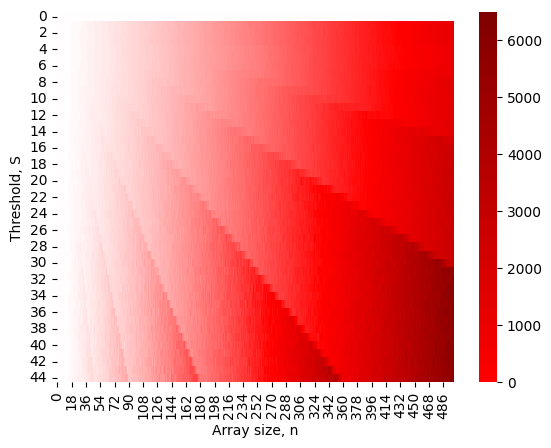

In [2]:
#switchSort()

from matplotlib import colors
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
import time
from timeit import default_timer as timer
%matplotlib inline

M = np.zeros((45,500)) # 2D array stores KEYCOMP_TOTAL
cpu_switchSort=[]

for i in range(1,45):     # Col: Array size, n;  Row: Threshold, S #
    st=timer()
    for j in range(1,500):
        L=generate(j)
        if (j<=i):   #if n<=S, use n 
            M[i][j]=switchSort(0,j-1,j)
        else:
            M[i][j] = switchSort(0,j-1,i)  #keycomp_total
    cpu_switchSort.append(timer()-st)
divnorm = colors.TwoSlopeNorm(vcenter=0.)
ax = sns.heatmap(M, linewidths=0, cmap='seismic', norm=divnorm)
plt.xlabel("Array size, n")
plt.ylabel("Threshold, S")
plt.show()

switchSort() - fix S=20, vary n

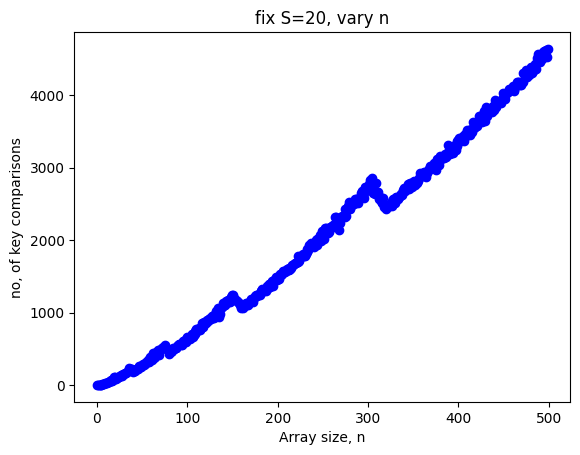

In [3]:
vary_n=[]
for i in range(0,500):
    vary_n.append(M[19][i])


plt.scatter(np.arange(0,500), vary_n, c='blue')
plt.xlabel("Array size, n")
plt.ylabel("no, of key comparisons")
plt.title("fix S=20, vary n")
plt.show()

switchSort() - vary S, fix n=10**4

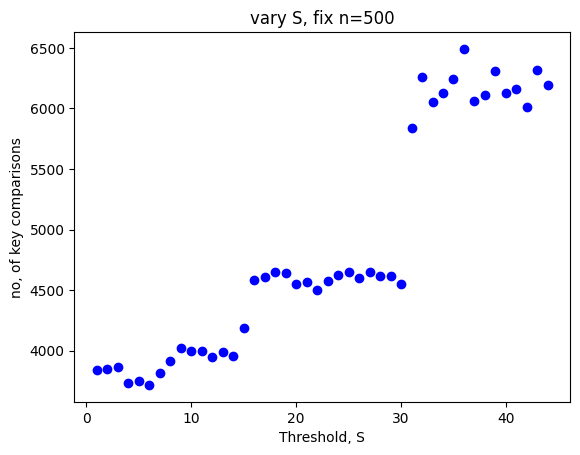

In [4]:
vary_S=[]
for i in range(1,45):
    vary_S.append(M[i][499])


plt.scatter(np.arange(1, 45), vary_S, c='blue')
plt.xlabel("Threshold, S")
plt.ylabel("no, of key comparisons")
plt.title("vary S, fix n=500")
plt.show()

original mergeSort()

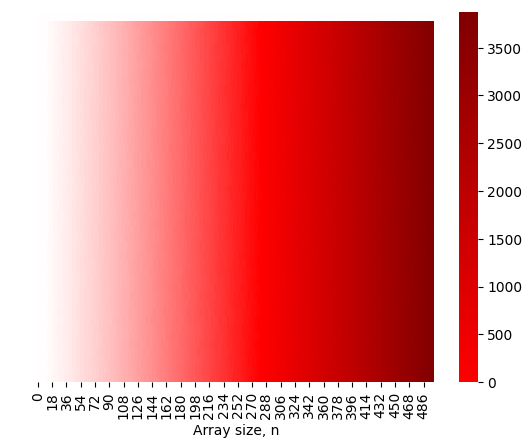

In [5]:
# Original mergeSort()

from matplotlib import colors
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
import time

def merge1(n, m):
  key_comparison1=0
  if m-n <= 0: return L
  mid = n + (m-n)//2
  a, b = n, mid+1
  while a <= mid and b <= m:
    key_comparison1+=1
    if L[a] < L[b]:
      a += 1
    elif L[a] > L[b]:
      temp = L[b]
      for i in range(b, a, -1):
        L[i] = L[i-1]
      L[a] = temp
      a += 1
      b += 1
      mid += 1
    else: # L[a] == L[b]
      if a == mid and b == m: break
      a += 1
      temp = L[b]
      for i in range(b, a, -1): 
        L[i] = L[i-1]
      L[a] = temp
      a += 1
      b += 1
      mid += 1
  return key_comparison1

def mergeSort1(n, m):
  key_comparison1_l=key_comparison1_r=key_comparison1_merge=0
  mid = n + (m-n)//2
  if m-n <= 0:
    return 0
  elif (m-n>1):
    key_comparison1_l = mergeSort1(n, mid)
    key_comparison1_r = mergeSort1(mid+1, m)
  key_comparison1_merge = merge1(n, m)
  return key_comparison1_l + key_comparison1_r + key_comparison1_merge


M2 = np.zeros((45,500)) # 2D array stores KEYCOMP_TOTAL
cpu_mergeSort=[]
for i in range(1,45):     # Col: Array size, n;  Row: Threshold, S #
  st=timer()
  for j in range(1,500):
      L=generate(j)
      M2[i][j] = mergeSort1(0,j-1)  #keycomp_total
  cpu_mergeSort.append(timer()-st)

divnorm = colors.TwoSlopeNorm(vcenter=0.)
ax = sns.heatmap(M2, linewidths=0, cmap='seismic', norm=divnorm)
plt.xlabel("Array size, n")
plt.yticks(color='w')
plt.tick_params(left=False)
plt.show()

switchSort() VERSUS mergeSort() - no. of key comparisons

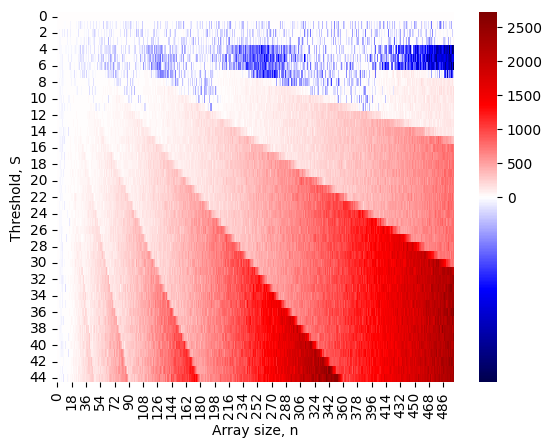

In [6]:
from matplotlib import colors
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
import time

M_f = np.subtract(M,M2)

divnorm = colors.TwoSlopeNorm(vcenter=0.)
ax2 = sns.heatmap(M_f, linewidths=0, cmap='seismic', norm=divnorm)
plt.xlabel("Array size, n")
plt.ylabel("Threshold, S")
plt.show()

switchSort() VERSUS mergeSort() - CPU time

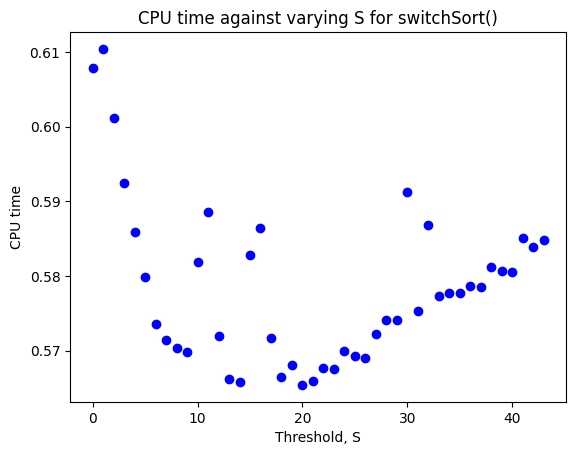

In [13]:
plt.scatter(np.arange(44), cpu_switchSort, c='blue')
plt.xlabel("Threshold, S")
plt.ylabel("CPU time")
plt.title("CPU time against varying S for switchSort()")
plt.show()

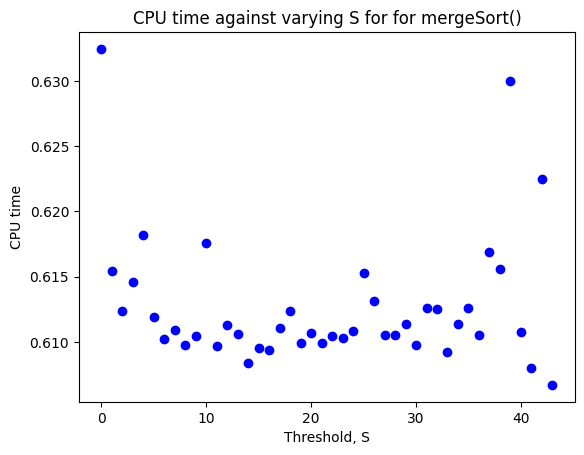

In [14]:
plt.scatter(np.arange(44), cpu_mergeSort, c='blue')
plt.xlabel("Threshold, S")
plt.ylabel("CPU time")
plt.title("CPU time against varying S for for mergeSort()")
plt.show()

From here, we can determine the optimal value of S.

Aim: make switchSort() an improved version of mergeSort() after incoporating insertionSort() for smaller arrays

Graph: numpy.subtract(switchSort(), mergeSort())

Positive regions(red) would mean the former has more key comparisons than the original algorithm and is undesirable.

Value of S in (white) regions would mean switchSort() has roughly the same number of comparisons as mergeSort() and (blue) regions switchSort() is more effective.

=> Therefore, range of values of S should be between the (blue) and (white) regions.